# Imported necessary libraries

In [0]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
import sklearn
import numpy as np
import nltk
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS


In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Data Analysis

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv to Tweets.csv


In [0]:
import io
Tweet = pandas.read_csv(io.BytesIO(uploaded['Tweets.csv']))

In [5]:
#Tweet= pandas.read_csv(r"F:\ASU\Fellowship\Data\Tweets.csv")
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


In [6]:
(len(Tweet)-Tweet.count())/len(Tweet)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [0]:
# Removing empty columns 
del Tweet['tweet_coord']
del Tweet['airline_sentiment_gold']
del Tweet['negativereason_gold']

In [8]:
Sentiment_count=Tweet['airline_sentiment'].value_counts()
Sentiment_count

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Text(0.5, 1.0, 'Sentiment v Sentiment count')

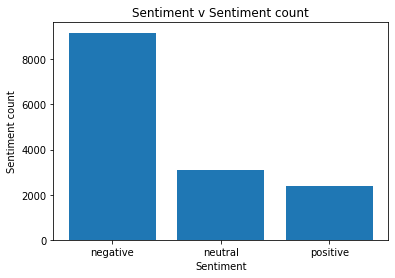

In [9]:
plt.bar([1,2,3], Sentiment_count)
plt.xticks([1,2,3], ['negative', 'neutral', 'positive'])
plt.ylabel('Sentiment count')
plt.xlabel('Sentiment')
plt.title('Sentiment v Sentiment count')

As we can see clearly that the negative comments have been dominated

In [10]:
!pip install wordcloud

In [11]:
Tweet['airline'].value_counts()


United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [0]:
def plot_sentiment(Airline):
    df=Tweet[Tweet['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Sentiment Mood Count')
    plt.xlabel('Mood')
    plt.title(Airline +' - Count of Moods')

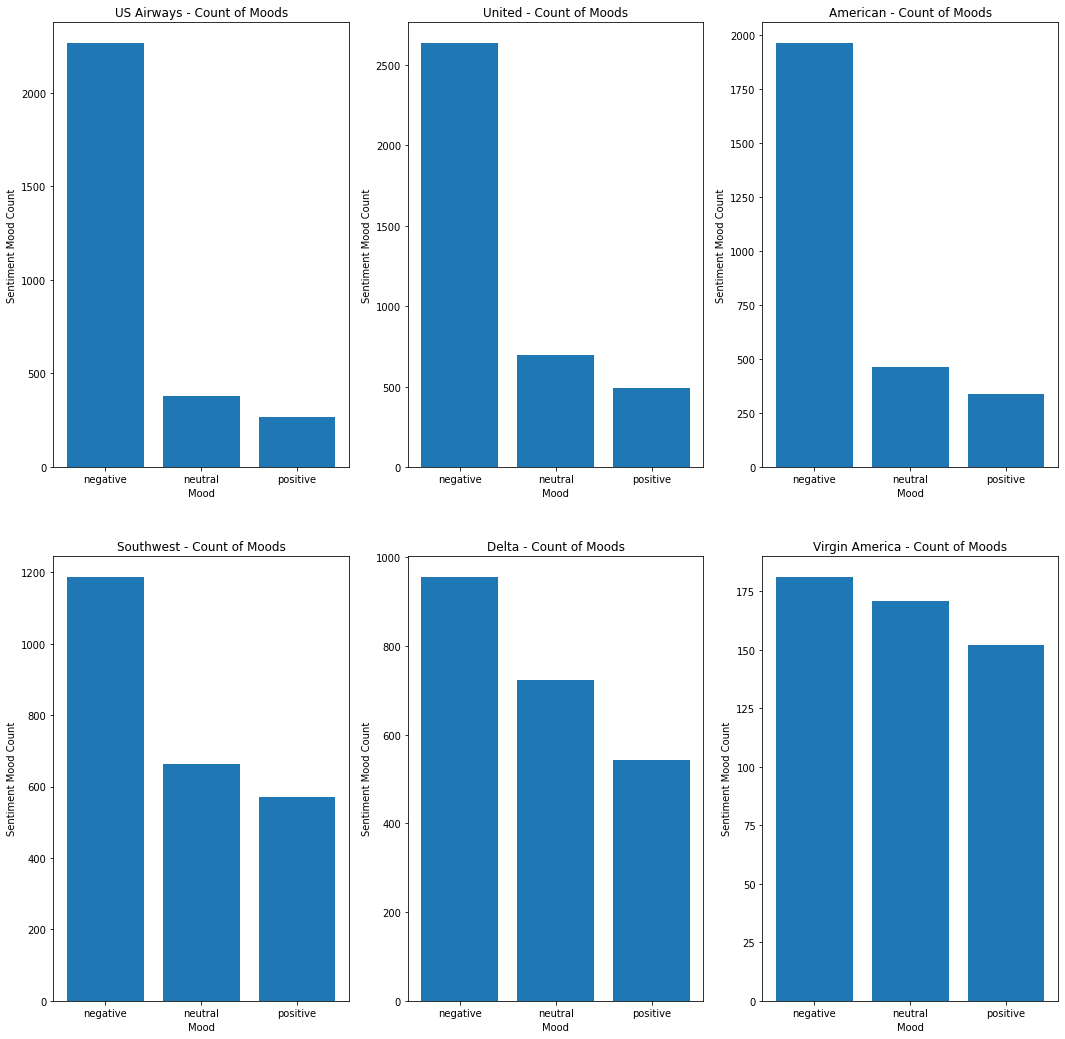

In [13]:
plt.figure(1,figsize=(18, 18))
plt.subplot(231)
plot_sentiment('US Airways')
plt.subplot(232)
plot_sentiment('United')
plt.subplot(233)
plot_sentiment('American')
plt.subplot(234)
plot_sentiment('Southwest')
plt.subplot(235)
plot_sentiment('Delta')
plt.subplot(236)
plot_sentiment('Virgin America')

In [0]:
NR_Count=dict(Tweet['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        df=Tweet
    else:
        df=Tweet[Tweet['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(Tweet['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pandas.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

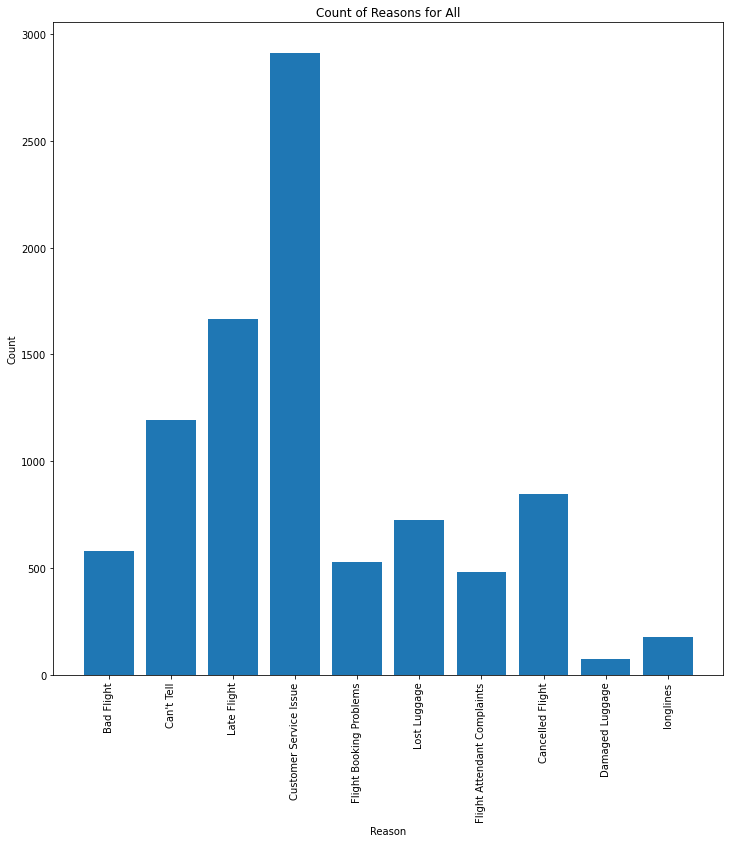

In [15]:
def plot_reason(Airline):
    df=NR_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plt.figure(1, figsize=(12,12))
plot_reason('All')

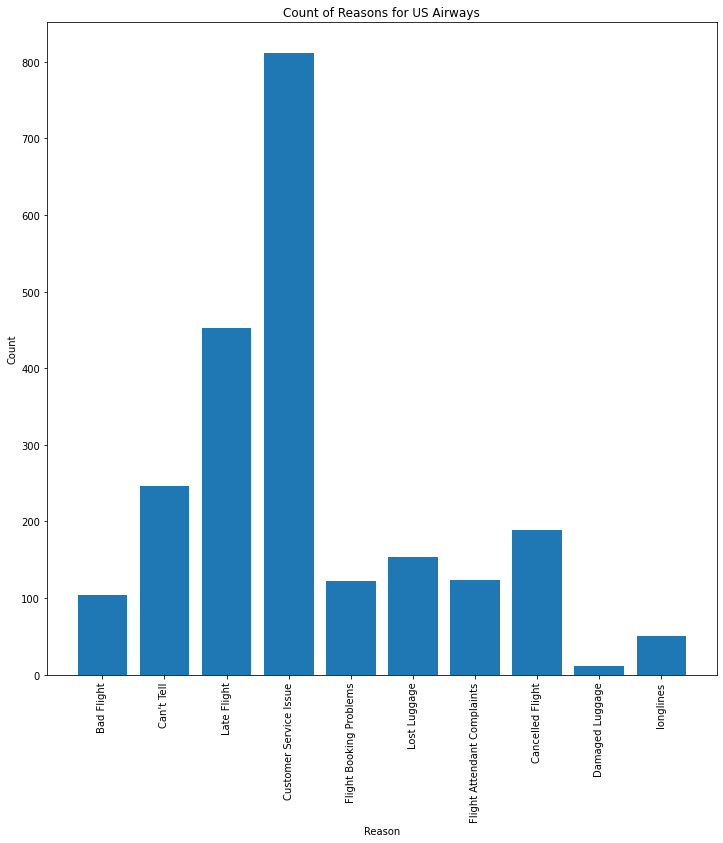

In [16]:
plt.figure(1, figsize=(12,12))
plot_reason('US Airways')

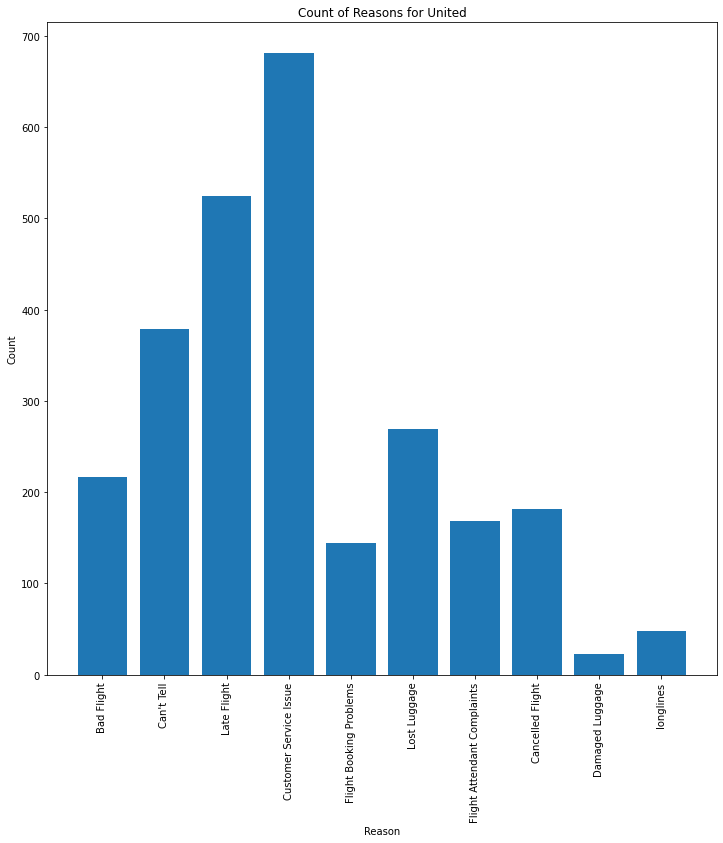

In [17]:
plt.figure(1, figsize=(12,12))
plot_reason('United')

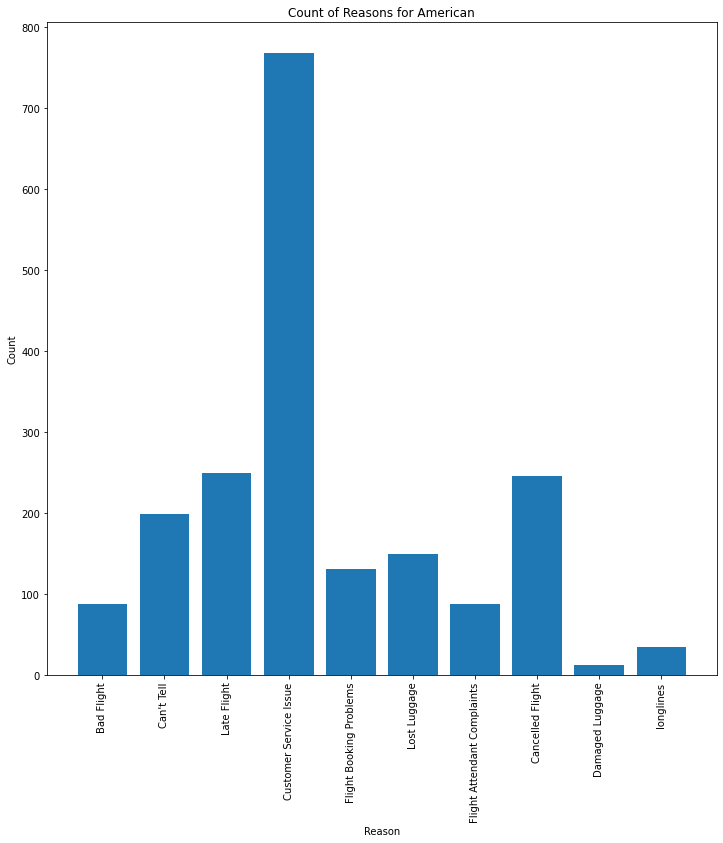

In [18]:
plt.figure(1, figsize=(12,12))
plot_reason('American')

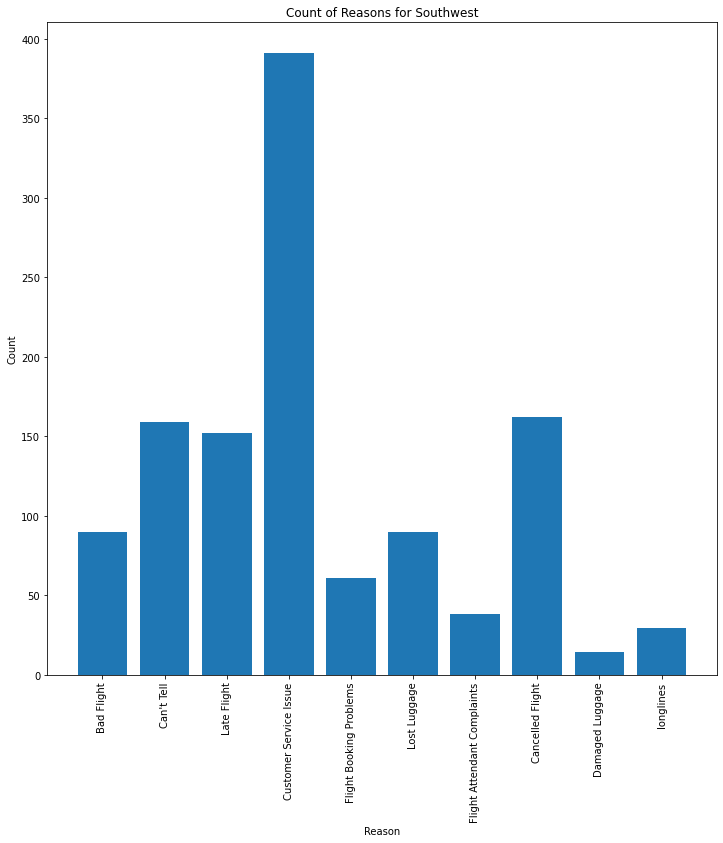

In [19]:
plt.figure(1, figsize=(12,12))
plot_reason('Southwest')

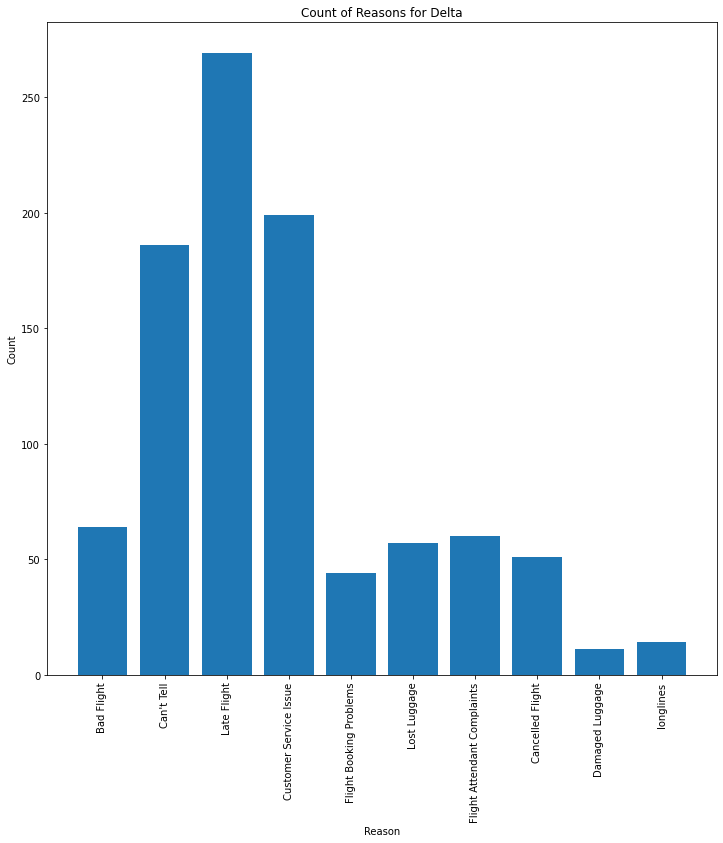

In [20]:
plt.figure(1, figsize=(12,12))
plot_reason('Delta')

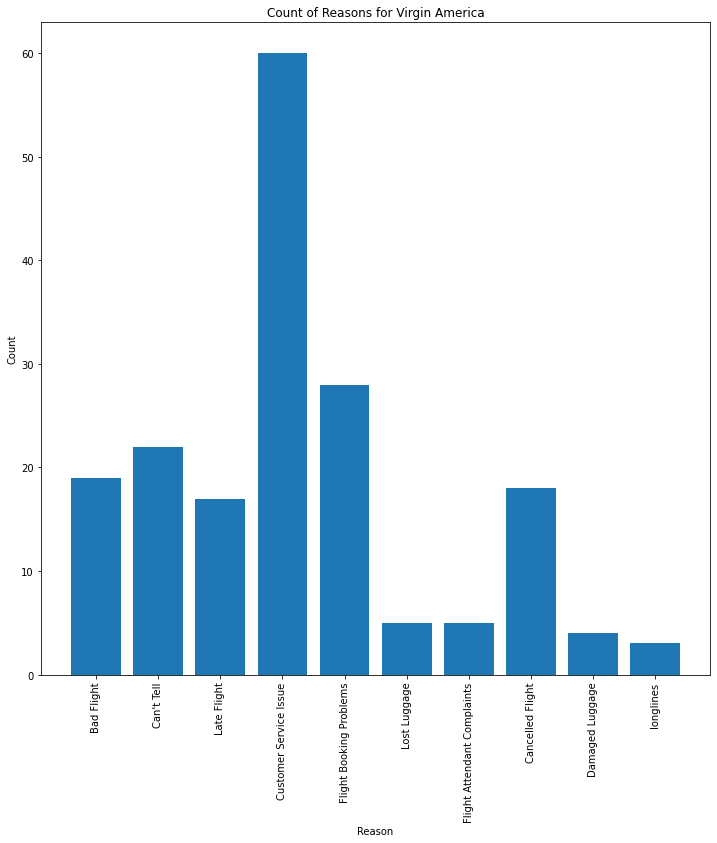

In [21]:
plt.figure(1, figsize=(12,12))
plot_reason('Virgin America')

In [0]:
df=Tweet[Tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word and not word.startswith('@') and word != 'RT'])


In [0]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=3000, height=2500).generate(cleaned_word)

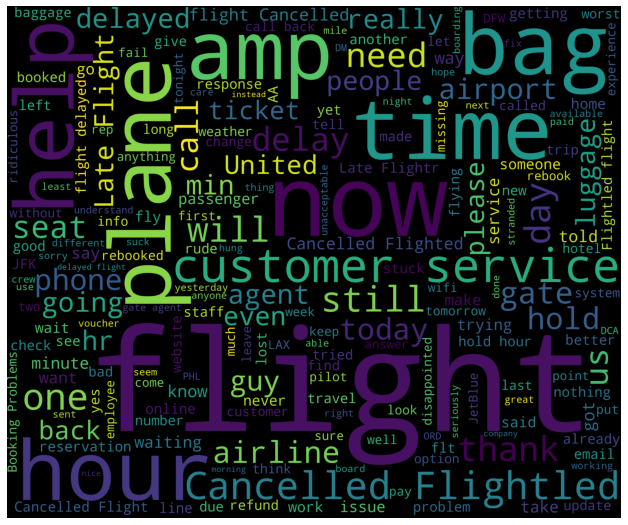

In [24]:
plt.figure(1,figsize=(11, 11))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:
df=Tweet[Tweet['airline_sentiment']=='positive']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word and not word.startswith('@') and word != 'RT'])

In [0]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=3000, height=2500).generate(cleaned_word)

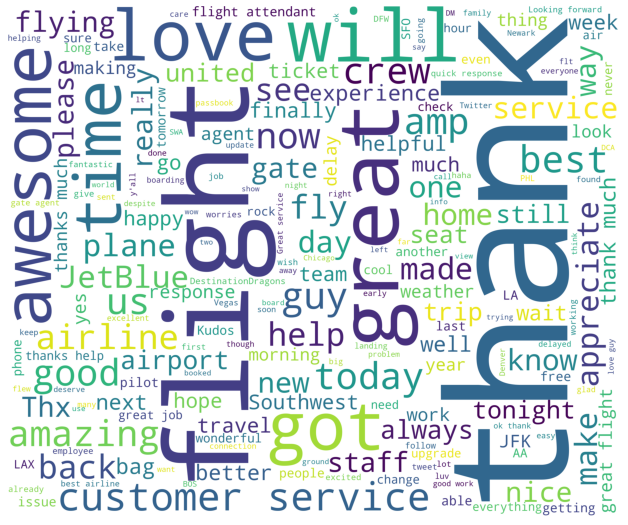

In [27]:
plt.figure(1,figsize=(11, 11))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Data Pre-processing

In [0]:
import re
import nltk
from nltk.corpus import stopwords

In [0]:
def remove_pattern(input_txt, pattern): 
    r = re.findall(pattern, input_txt)
    for i in r: 
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [0]:
def clean_data(data): 
    data = data.str.replace('http?://[A-Za-z0-9./]+', " ")
    data = data.str.replace("[^a-zA-Z#]", " ")
    # removes short words
    data = data.apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
    return data

In [0]:
Tweet['cleaned_tweets'] = np.vectorize(remove_pattern)(Tweet['text'], "@[\w]*")

In [32]:
Tweet['cleaned_tweets'] = clean_data(Tweet['cleaned_tweets'])
print(Tweet['cleaned_tweets'])

0                                                What said
1                  plus added commercials experience tacky
2              didn today Must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                       really thing about
                               ...                        
14635                       thank different flight Chicago
14636    leaving over minutes Late Flight warnings comm...
14637           Please bring American Airlines #BlackBerry
14638    have money change flight answer your phones ot...
14639    have need know many seats next flight standby ...
Name: cleaned_tweets, Length: 14640, dtype: object


In [0]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [34]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
Tweet['cleaned_tweets']=Tweet['cleaned_tweets'].apply(lambda x: tweet_to_words(x))
print(Tweet['cleaned_tweets'])

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                             really thing
                               ...                        
14635                       thank different flight chicago
14636    leaving minutes late flight warnings communica...
14637            please bring american airlines blackberry
14638    money change flight answer phones suggestions ...
14639    need know many seats next flight standby peopl...
Name: cleaned_tweets, Length: 14640, dtype: object


In [36]:
df = Tweet[['airline_sentiment', 'cleaned_tweets']]
df = df.rename(columns={'airline_sentiment':'labels'})
df.head()

,labels,cleaned_tweets
0,neutral,said
1,positive,plus added commercials experience tacky
2,neutral,today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainmen...
4,negative,really thing


In [0]:
test_df = df.sample(frac=0.15) 
 # Randomly selects 15% of the total data as test dataset
train_df = df.drop(test_df.index)
# Remaining is train data

In [0]:
! conda create -n fastai
! conda activate fastai

In [0]:
from fastai.text import * 

# Prepare Test and Train data

In [39]:
# Prepare data for language model
data_lm = TextLMDataBunch.from_df(train_df = train_df, valid_df = test_df, path = "")

# Prepare data for classifier model
data_clas = TextClasDataBunch.from_df(path = "", train_df = train_df, valid_df = test_df, 
                                      vocab=data_lm.train_ds.vocab, bs=16)

# Language Model

In [44]:
learned_model = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.5)

In [45]:
learned_model.fit_one_cycle(1, 1e-2)


epoch,train_loss,valid_loss,accuracy,time
0,7.303060,6.354460,0.117188,04:27


In [46]:
# unfreeze the last layer
learned_model.freeze_to(-1)
learned_model.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,6.328876,5.994312,0.144420,04:28


In [47]:
# unfreeze one more layer
learned_model.freeze_to(-2)
learned_model.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,6.083416,5.818099,0.163929,04:31


In [48]:
# unfreeze one more layer
learned_model.freeze_to(-3)
learned_model.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.884353,5.694160,0.166741,04:50


In [49]:
# unfreeze all layers
learned_model.unfreeze()
learned_model.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.672179,5.617929,0.171652,04:58


In [0]:
# Save the language model
learned_model.save_encoder('tweet_lm')


# Classifier Model

In [51]:
# Initialize classifier model using the fine-tuned language model
learn_classifier_model = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.5)
learn_classifier_model.load_encoder('tweet_lm')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (12444 items)
x: TextList
xxbos said,xxbos today must mean need take another trip,xxbos really aggressive blast obnoxious entertainment guests faces little recourse,xxbos really thing,xxbos seriously would flight seats playing really thing flying
y: CategoryList
neutral,neutral,negative,negative,negative
Path: .;

Valid: LabelList (2196 items)
x: TextList
xxbos flying infant time bring xxunk xxunk xxunk carry plastic xxunk xxunk,xxbos speak human need find delayed website telling different things hung,xxbos back least stuck look apologize trouble,xxbos another experience today frozen xxunk missing connection,xxbos flight missed mech issue food voucher xxunk different airport rental reimbursement
y: CategoryList
neutral,negative,negative,negative,negative
Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(4560, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout

In [52]:
learn_classifier_model.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.664356,0.584305,0.761384,09:04


In [53]:
learn_classifier_model.freeze_to(-1)
learn_classifier_model.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.652068,0.578319,0.755920,08:26


In [54]:
learn_classifier_model.unfreeze()
learn_classifier_model.fit_one_cycle(1, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.648547,0.547355,0.774135,11:20


In [55]:
# Example of prediction on a single tweet
learn_classifier_model.predict('your ticket prices are bad')

(Category negative, tensor(0), tensor([0.6943, 0.2627, 0.0430]))

# Result

The classifier model achieved an accuracy of around 77%. 
This result can be improved by applying more pre-processing techniques.

